<a href="https://colab.research.google.com/github/listiadhea/Project-Dicoding/blob/main/bike_sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyek Analisis Data
- Nama: Dhea Listia Apriyanti
- Email: dhealistia13@gmail.com
- Id Dicoding: https://www.dicoding.com/users/dhealistia

#Menentukan Pertanyaan Bisnis
1. Specific
 * Kapan terjadi lonjakan penyewa sepeda terakhir, dan faktor apa yang memicu peningkatan tersebut dalam bisnis ini?
2. Measurable
 * Berapa jumlah penyewa sepeda pada hari libur (holiday) terakhir, dan bagaimana trennya dalam beberapa bulan terakhir?
3. Action-Oriented
  * Bagaimana meningkatkan penggunaan rental sepeda oleh pelanggan casual pada weekday?
4. Relevan
  * Bagaimana variabel seperti season, dan weather_cond dapat mempengaruhi jumlah total pengguna sepeda baik Casual maupun Registered?
5. Time-Bound
  * Berapa distribusi sewa sepeda per jam selama musim gugur tahun 2012

#Menyiapkan semua library yang dibutuhkan

######Sebelum memulai proyej, pastikan kita telah mengimport semua library yang dibutuhkan untuk mengerjakan proyeknya

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Data Wrangling

###Gathering Data

#####Pada tahap ini kita akan mengumpulkan data yang dibutuhkan

In [68]:
day_df = pd.read_csv("/content/drive/MyDrive/belajar_analysis_data_dengan_python/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [69]:
hour_df = pd.read_csv("/content/drive/MyDrive/belajar_analysis_data_dengan_python/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##Asessing Data

####Menilai Tabel

######1. Mengecek tipe data day_df dan hour_df

In [70]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

#####Terdapat kesalahan dalam jenis data pada kolom, dteday yang awalnya berupa objek. Tetapi seharusnya berupa tipe data datetime

#####2. Mengecek apakah ada missing value

In [71]:
day_df.isna().sum()
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

######Dapat disimpulkan bahwa tidak ada missing value

####3. Mengecek duplikat data

In [72]:
print("Jumlah duplikasi hari: ", day_df.duplicated().sum())
print("Jumlah duplikasi jam: ", hour_df.duplicated().sum())

Jumlah duplikasi hari:  0
Jumlah duplikasi jam:  0


######Pada tabel day_df dan hour_df tidak terdapat duplikasi data, artinya semua data bersifat unik

#####4. Mengecek apakah ada keanehan

In [73]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#####Tidak ada keanehan pada nilai statistiknya

In [74]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


##Cleaning Data

####1. Menghapus dtype pada tabel day_)df dan hour_df

In [80]:
day_df['dateday'] = pd.to_datetime(day_df["dateday"])
hour_df['dateday'] = pd.to_datetime(hour_df["dateday"])

In [81]:
print('day_df["dateday"] : ', day_df["dateday"].dtypes)
print('hour_df["dateday"] : ', hour_df["dateday"].dtypes)

day_df["dateday"] :  datetime64[ns]
hour_df["dateday"] :  datetime64[ns]


In [82]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       731 non-null    int64         
 1   dateday       731 non-null    datetime64[ns]
 2   season        731 non-null    int64         
 3   year          731 non-null    int64         
 4   month         731 non-null    int64         
 5   holiday       731 non-null    int64         
 6   weekday       731 non-null    int64         
 7   workingday    731 non-null    int64         
 8   weather_cond  731 non-null    int64         
 9   temp          731 non-null    float64       
 10  atemp         731 non-null    float64       
 11  hum           731 non-null    float64       
 12  windspeed     731 non-null    float64       
 13  casual        731 non-null    int64         
 14  registered    731 non-null    int64         
 15  count         731 non-null    int64     

#####2. Menghapus beberapa kolom yang tidak digunakan

######Berdasarkan pertanyaan bisnis, maka untuk kolo yang ada didrop yakni,
- instant: karena indeks catatan ini tidak memberikan informasi tambahan yang berguna
- winsdpeed: tidak ada pertanyaan bisnis yang terkait dengan efek kecepatan angin terhadap jumlah penyewa sepeda

In [83]:
drop_col = ['instant', 'windspeed']

for i in day_df.columns:
  if i in drop_col:
    day_df.drop(labels=i, axis=1, inplace=True)

In [84]:
  day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


#####3. Mengubah beberapa detail tentang kolom

######Merubah beberapa tipe data yang tidak sesuai

In [85]:
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

In [86]:
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
day_df['weather_cond'] = day_df['weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [87]:
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather_cond'] = day_df.weather_cond.astype('category')

In [88]:
day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,82,1518,1600


In [89]:
day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,Spring,0,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,Spring,0,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,Spring,0,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,Spring,0,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,Spring,0,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,82,1518,1600


In [90]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dateday       731 non-null    datetime64[ns]
 1   season        731 non-null    category      
 2   year          731 non-null    category      
 3   month         731 non-null    category      
 4   holiday       731 non-null    category      
 5   weekday       731 non-null    category      
 6   workingday    731 non-null    category      
 7   weather_cond  731 non-null    category      
 8   temp          731 non-null    float64       
 9   atemp         731 non-null    float64       
 10  hum           731 non-null    float64       
 11  casual        731 non-null    int64         
 12  registered    731 non-null    int64         
 13  count         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(3), int64(3)
memory usage: 46.5 KB


In [91]:
hour_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

In [92]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       17379 non-null  int64         
 1   dateday       17379 non-null  datetime64[ns]
 2   season        17379 non-null  int64         
 3   year          17379 non-null  int64         
 4   month         17379 non-null  int64         
 5   hour          17379 non-null  int64         
 6   holiday       17379 non-null  int64         
 7   weekday       17379 non-null  int64         
 8   workingday    17379 non-null  int64         
 9   weather_cond  17379 non-null  int64         
 10  temp          17379 non-null  float64       
 11  atemp         17379 non-null  float64       
 12  hum           17379 non-null  float64       
 13  windspeed     17379 non-null  float64       
 14  casual        17379 non-null  int64         
 15  registered    17379 non-null  int64 

In [93]:
hour_df['month'] = hour_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
hour_df['season'] = hour_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
hour_df['weekday'] = hour_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})
hour_df['weather_cond'] = hour_df['weather_cond'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
})

In [94]:
hour_df['season'] = hour_df.season.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['holiday'] = hour_df.holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['workingday'] = hour_df.workingday.astype('category')
hour_df['weather_cond'] = hour_df.weather_cond.astype('category')


In [95]:
hour_df.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather_cond,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,Jan,0,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,Jan,1,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,Jan,2,0,Sat,0,Clear/Partly Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,Jan,3,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,Jan,4,0,Sat,0,Clear/Partly Cloudy,0.24,0.2879,0.75,0.0,0,1,1


In [128]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       17379 non-null  int64         
 1   dateday       17379 non-null  datetime64[ns]
 2   season        17379 non-null  category      
 3   year          17379 non-null  category      
 4   month         17379 non-null  category      
 5   hour          17379 non-null  int64         
 6   holiday       17379 non-null  category      
 7   weekday       17379 non-null  category      
 8   workingday    17379 non-null  category      
 9   weather_cond  17379 non-null  category      
 10  temp          17379 non-null  float64       
 11  atemp         17379 non-null  float64       
 12  hum           17379 non-null  float64       
 13  windspeed     17379 non-null  float64       
 14  casual        17379 non-null  int64         
 15  registered    17379 non-null  int64 

#Exploratory Data Analysis

##Explorasi Data

###1. Mengelompokkan penyewa sepeda berdasarkan bulan

In [97]:
day_df.groupby(by='month').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
        max   min         mean     sum
month                                 
Apr    7460   795  4484.900000  269094
Aug    7865  1115  5664.419355  351194
Dec    6606   441  3403.806452  211036
Feb    5062  1005  2655.298246  151352
Jan    4521   431  2176.338710  134933
Jul    8173  3285  5563.677419  344948
Jun    8120  3767  5772.366667  346342
Mar    8362   605  3692.258065  228920
May    8294  2633  5349.774194  331686
Nov    6852  1495  4247.183333  254831
Oct    8156    22  5199.225806  322352
Sep    8714  1842  5766.516667  345991

######Berdasarkan hasil tersebut, dapat disimpulkan lonjakan penyewa sepeda terjadi pada bulan Juni sebanyak 346342 penyewa. Sedangkan pada bulan Januari menurun hanya 134933 penyewa.

###2. Mengelompokkan berdasarkan penyewa sepeda berdasarkan holiday

In [98]:
day_df.groupby(by='holiday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                            
          max   min         mean      sum
holiday                                  
0        8714    22  4527.104225  3214244
1        7403  1000  3735.000000    78435

######Berdasarkan hasil tersebut, dapat disimpulkan bahwa penyewa sepeda lebih banyak saat workingday sebanyak 2292410 dibandingkan dengan non-workingday sebanyak 1000269

###3. Mengelompokkan penyewa sepeda berdasarkan cuaca

In [99]:
day_df.groupby(by='weather_cond').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
                      max  min         mean      sum
weather_cond                                        
Clear/Partly Cloudy  8714  431  4876.786177  2257952
Light Snow/Rain      4639   22  1803.285714    37869
Misty/Cloudy         8362  605  4035.862348   996858

######Berdasarkan hasil tersebut, dapat disimpulkan bawha para penyewa sepeda lebih suka menyewa sepeda pada saat cuaca sedang cerah atau mendung. Kemudian, sangat sedikit yang menyewa sepeda pada saat salju turun.

###4. Membandingkan penyewa sepeda berdasarkan musim

In [101]:
day_df.groupby(by='season').agg({
    'casual': 'mean',
    'registered': 'mean',
    'count': ['max', 'min', 'mean', 'sum']
})

casual   registered count                            
               mean         mean   max   min         mean      sum
season                                                            
Fall    1202.611702  4441.691489  8714  1115  5644.303191  1061129
Spring   334.928177  2269.204420  7836   431  2604.132597   471348
Summer  1106.097826  3886.233696  8362   795  4992.331522   918589
Winter   729.112360  3999.050562  8555    22  4728.162921   841613

######Berdasarkan hasil tersebut, penyewa sepeda lebih banyak pada musim gugur (Fall). Sedangkan lebih sedikit pada musim panas (Spring).

###5. Mengelompokkan penyewa sepeda berdasarkan workingday non-working day

In [ ]:
day_df.groupby(by='workingday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
             max  min         mean      sum
workingday                                 
0           8714  605  4330.168831  1000269
1           8362   22  4584.820000  2292410

######Berdasarkan hasil tersebut, jumlah penyewaan sepeda terbesar pada saat workingday atau hari kerja dibandingkan dengan hari non-workingday. Namun dilihat juga, hasilnya lumayan berbeda walaupun tidak banyak.

###6. Mengelompokkan penyewa sepeda berdasarkan weekday

In [102]:
day_df.groupby(by='weekday').agg({
    'count': ['max', 'min', 'mean', 'sum']
})

count                           
          max   min         mean     sum
weekday                                 
Fri      8362  1167  4690.288462  487790
Mon      7525    22  4338.123810  455503
Sat      8714   627  4550.542857  477807
Sun      8227   605  4228.828571  444027
Thu      7804   431  4667.259615  485395
Tue      7767   683  4510.663462  469109
Wed      8173   441  4548.538462  473048

######Dilihat dari tabel diatas rata-ratanya tidak terlalu berbeda jauh, peringkat pertama dengan hari yang jumlah rata-ratanya  tertinggi adalah hari jumat diikuti oleh hari kamis, sabtu, rabu, selasa, minggu, dan yang terakhir senin.

###7. Mengelompokkan temp, hum, dan humidity berdasarkan season

In [105]:
day_df.groupby(by='season').agg({
    'temp': ['max', 'min', 'mean'],
    'atemp': ['max', 'min', 'mean'],
    'count': ['max', 'min', 'mean', 'sum']
})

temp                         atemp                     count  \
             max       min      mean       max       min      mean   max   
season                                                                     
Fall    0.861667  0.469167  0.706309  0.840896  0.242400  0.655898  8714   
Spring  0.572500  0.059130  0.297748  0.548617  0.079070  0.296914  7836   
Summer  0.808333  0.253043  0.544405  0.757579  0.250339  0.520307  8362   
Winter  0.657500  0.220833  0.422906  0.607975  0.227913  0.415539  8555   

                                    
         min         mean      sum  
season                              
Fall    1115  5644.303191  1061129  
Spring   431  2604.132597   471348  
Summer   795  4992.331522   918589  
Winter    22  4728.162921   841613

######Dapat disimpulkan bahwa:
- Rata-rata temperatur dan atemp tertinggi terjadi pada musim gugur yang selanjutnya diikuti oleh summer, winter, dan spring.
- Rata-raa humidity terjadi pada musim dingin yang selanjutnya diikuti oleh fall, summer, dan spring.

###8. hubungan antara penyewa casual, registered, dan count

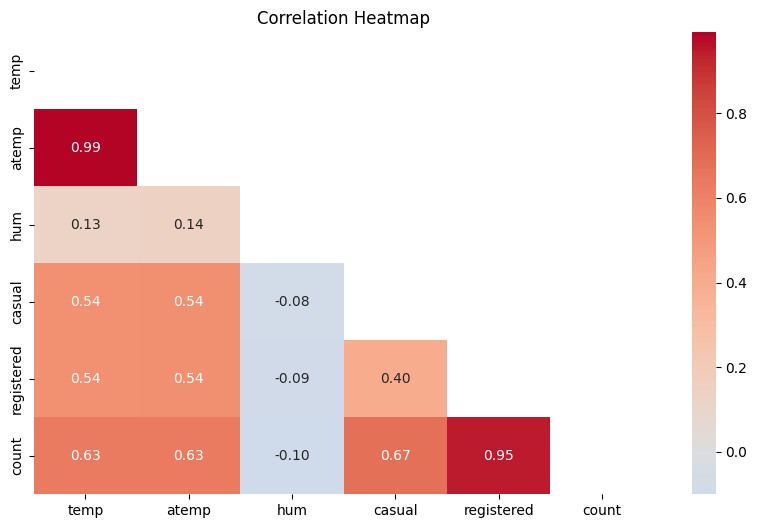

In [104]:
fig, ax = plt.subplots(figsize=(10,6))
correlation_matrix = day_df.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(
    correlation_matrix,
    annot=True,
    mask=mask,
    cmap="coolwarm",
    center=0,
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

######Berdasarkan hasil analisis dapat disimpulkan pernyataan sebagai berikut:
- atemp dan temp sangat berkorelasi (0.99)
- hum memiliki korelasi lemah dengan temp dan atem (0.13 dan 0.14)- casual cukup berkorelasi dengan temp dan atemp (0.54) dan sedikit negatif dengan hum (-0.08)
- registered memiliki pola yang sama seperti casual dan berkorelasi moderat dengan casual (0.40)
- count berkorelasi kuat dengan temp, atemp, casual, dan registered (0.63, 0.63, 0.67, dan 0.95)

#Visualization & Explanatory Analysis

##Pertanyaan 1: Kapan terjadi lonjakan penyewa sepeda terakhir, dan faktor apa yang memicu peningkatan tersebut dalam bisnis ini?

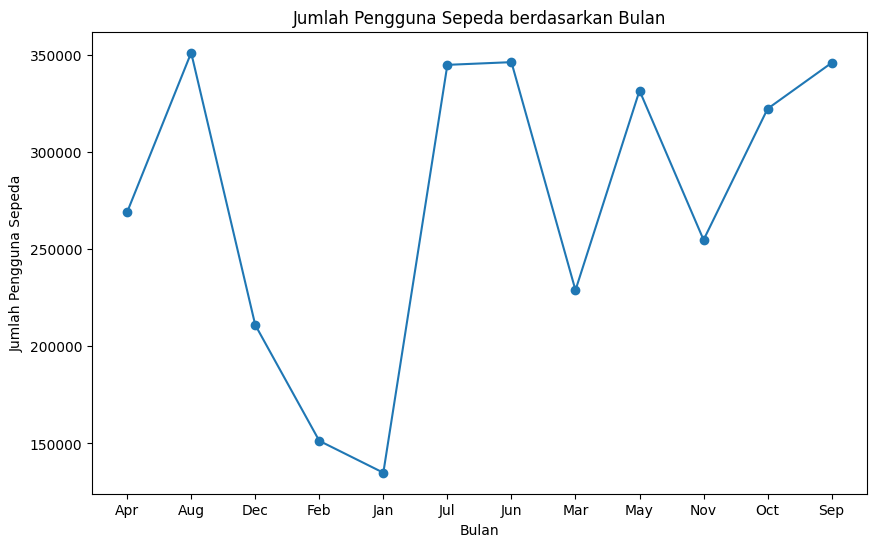

In [119]:
monthly_counts = day_df.groupby(by=["month"]).agg({
    "count": "sum"
}).reset_index()

# Plot jumlah pengguna sepeda berdasarkan bulan
plt.figure(figsize=(10, 6))
plt.plot(monthly_counts['month'], monthly_counts['count'], marker='o', linestyle='-')

plt.title('Jumlah Pengguna Sepeda berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()


######Berdasarkan visualisasi data di atas, terlihat bahwa lonjakan kenaikan penyewa sepeda terjadi pada bulan Agustus, Juni, dan Juli. Sedangkan Januari dengan jumlah pengguna sepeda terkecil.

##Pertanyaan 2: Berapa jumlah penyewa sepeda pada hari libur (holiday), hari kerja (workingday), dan weekday (hari dalam seminggu. Bagaimana trennya dalam beberapa bulan terakhir?

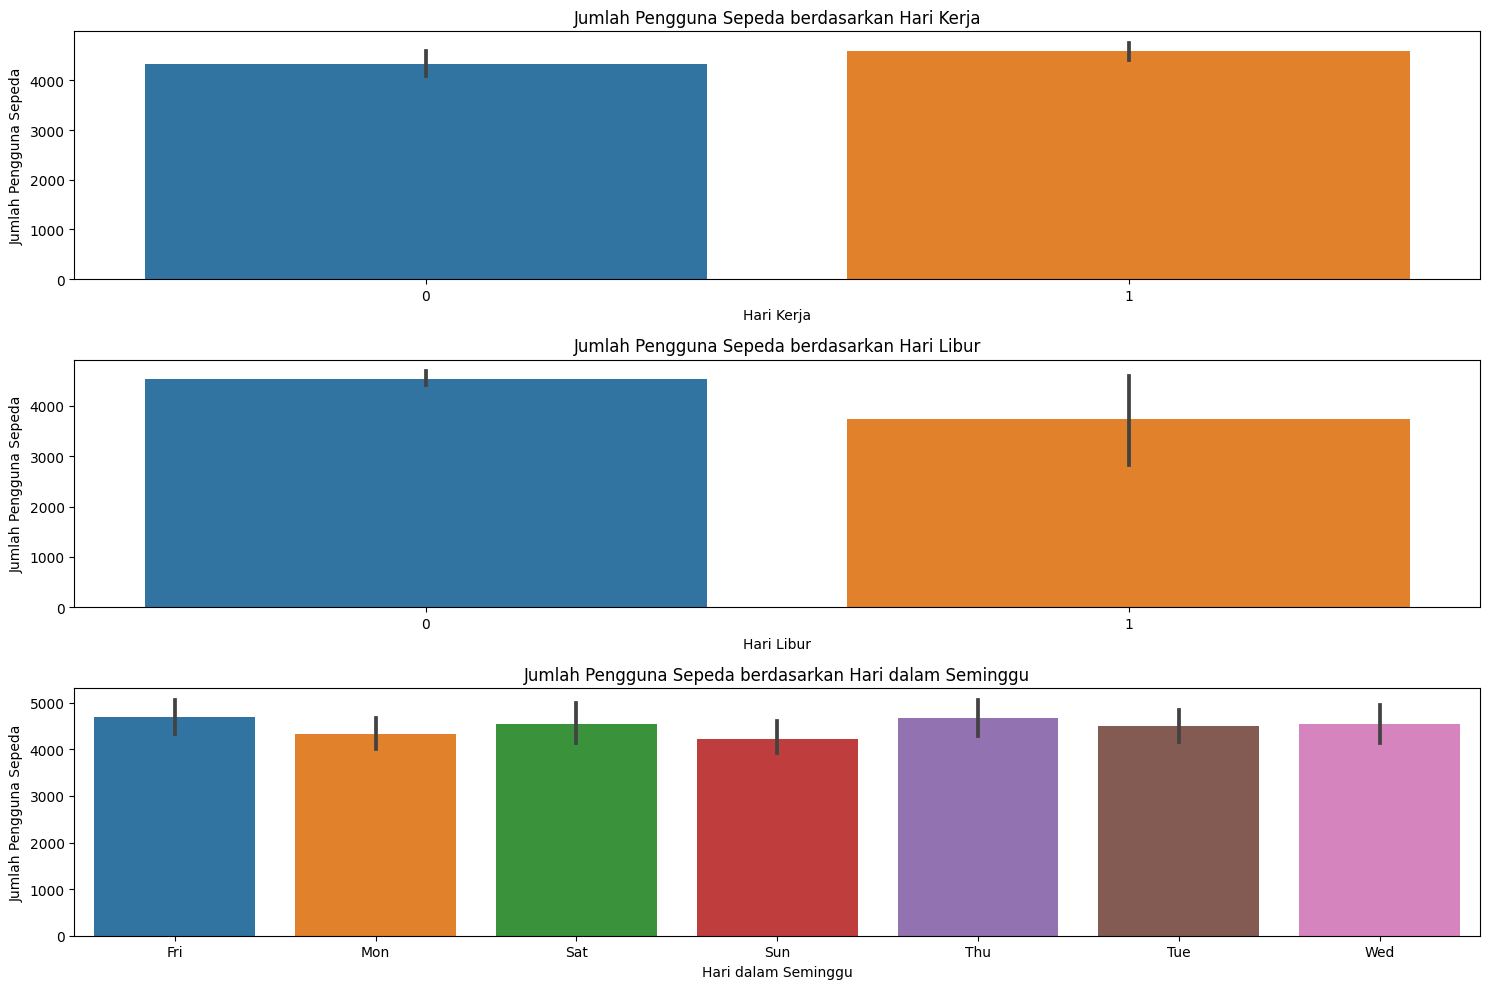

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,10))

# Berdasarkan workingday
sns.barplot(
    x='workingday',
    y='count',
    data=day_df,
    ax=axes[0])
axes[0].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Kerja')
axes[0].set_xlabel('Hari Kerja')
axes[0].set_ylabel('Jumlah Pengguna Sepeda')

# Berdasarkan holiday
sns.barplot(
  x='holiday',
  y='count',
  data=day_df,
  ax=axes[1])
axes[1].set_title('Jumlah Pengguna Sepeda berdasarkan Hari Libur')
axes[1].set_xlabel('Hari Libur')
axes[1].set_ylabel('Jumlah Pengguna Sepeda')

# Berdasarkan weekday
sns.barplot(
  x='weekday',
  y='count',
  data=day_df,
  ax=axes[2])
axes[2].set_title('Jumlah Pengguna Sepeda berdasarkan Hari dalam Seminggu')
axes[2].set_xlabel('Hari dalam Seminggu')
axes[2].set_ylabel('Jumlah Pengguna Sepeda')

plt.tight_layout()
plt.show()


######Berdasarkan visualisasi data tersebut, daapt disimpulkan bahawa jumlah penyewa lebih banyak pada saat workday daripada akhir pekan. Kemudian jumlah penyewa sepeda jauh lebih banyak pada hari biasa dibandingkan hari libur. Lalu, hari jumat menjadi hari terbanyak penyewa sepeda. Dan hari minggu menempati posisi terakhir dengan jumlah penyewa sepeda yang paling sedikit.

#Pertanyaan 3: Bagaimana meningkatkan penggunaan rental sepeda oleh pelanggan casual pada weekday?

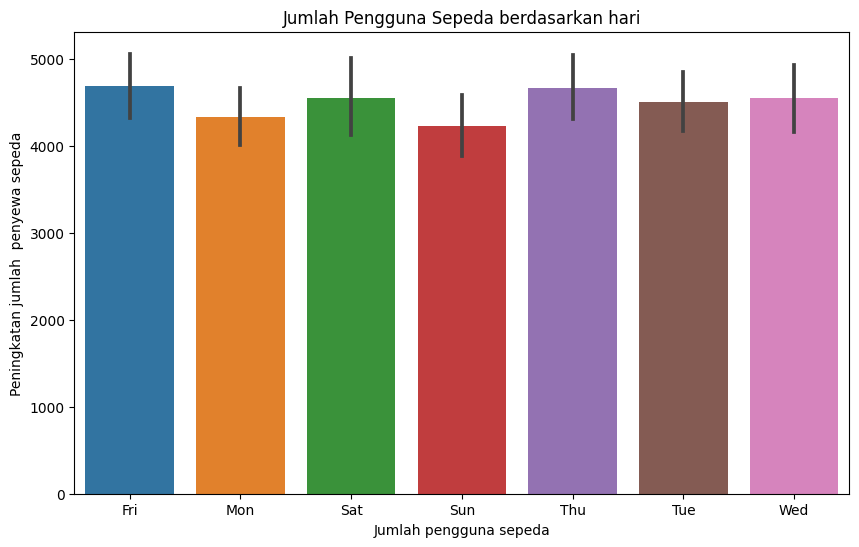

In [121]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weekday',
    y='count',
    data=day_df)

plt.title('Jumlah Pengguna Sepeda berdasarkan hari')
plt.xlabel('Jumlah pengguna sepeda')
plt.ylabel('Peningkatan jumlah  penyewa sepeda')
plt.show()

######Berdasarkan visualisasi data di atas, dapat disimpulkan bahwa hari jumat menjadi hari dengan jumlah pengguna sepeda terbanyak yang disusul oleh hari kamis, sabtu, rabu, minggu, dan terakhir senin.

##Pertanyaan 4: Bagaimana variabel seperti season, dan weather_cond dapat mempengaruhi jumlah total pengguna sepeda baik Casual maupun Registered?

Text(0.5, 1.0, 'Weather Cond vs Count')

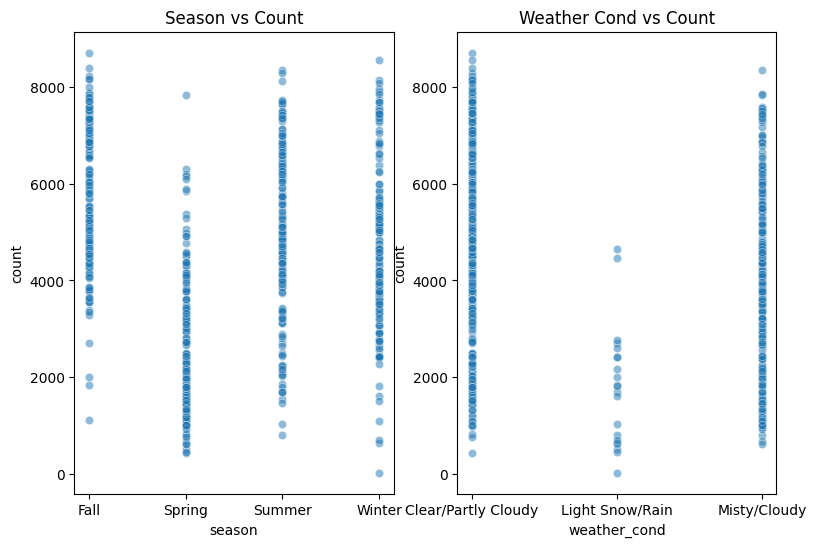

In [122]:
plt.figure(figsize=(14, 6))

# Scatter plot untuk 'temp' vs 'count'
plt.subplot(1, 3, 1)
sns.scatterplot(
    x='season',
    y='count',
    data=day_df,
    alpha=0.5
)
plt.title('Season vs Count')

# Scatter plot untuk 'atemp' vs 'count'
plt.subplot(1, 3, 2)
sns.scatterplot(
    x='weather_cond',
    y='count',
    data=day_df,
    alpha=0.5
)
plt.title('Weather Cond vs Count')

######Hasil analisis di atas, dapat ditarik kesimpulan bahwa hubungan antara season dan count ternyata menunjukkan korelasi positif diantara dua variabel. Lalu, hubungan weather_cond dan count juga menunjukkan korelasi yang sedikit negati, tetapi tidak terlalu signifikan karena condong ke kirinya tidak terlalu nampak.

##Pertanyaan 5: Berapa distribusi sewa sepeda per jam selama musim gugur tahun 2012

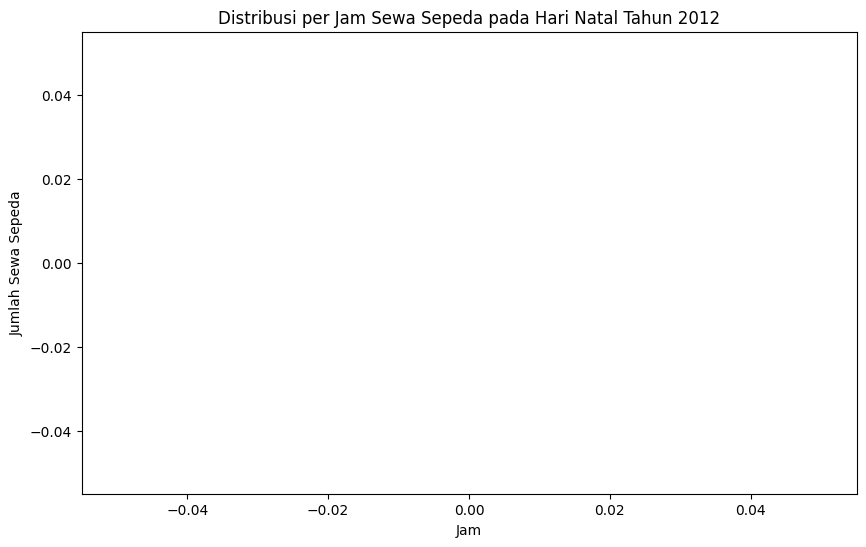

In [130]:
filtered_data = hour_df[(hour_df["year"] == 1) & (hour_df["holiday"] == 1) & (hour_df["season"] == 2)]

distribusi_per_jam = filtered_data.groupby("hour")["count"].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(distribusi_per_jam['hour'], distribusi_per_jam['count'], marker='o', linestyle='-')

plt.title('Distribusi per Jam Sewa Sepeda pada Hari Natal Tahun 2012')
plt.xlabel('Jam')
plt.ylabel('Jumlah Sewa Sepeda')
plt.show()

######Dapat disimpulkan bahwa, Jika distribusi per jam menunjukkan waktu-waktu tertentu yang memiliki tingkat peminjaman lebih rendah, ini bisa menjadi peluang untuk mempromosikan penawaran khusus atau aktivitas untuk meningkatkan penggunaan sepeda pada jam-jam tersebut.

#Conclusion


*  Conclusion Pertanyaan 1: Kapan terjadi lonjakan penyewa sepeda terakhir, dan faktor apa yang memicu peningkatan tersebut?

Lonajakan penyewaan sepeda terjadi pada bulan agustus, juli, dan juni. Beberapa faktor yang dapat mempengaruhi hal tersebut adalah musim dan kondisi cuaca.



* Conclusion Pertanyaan 2: Berapa jumlah penyewa sepeda pada hari libur (holiday), hari kerja (workingday), dan weekday (hari dalam seminggu). Bagaimana trennya dalam beberapa bulan terakhir?

Jumlah penyewa lebih banyak pada saat workday daripada akhir pekan. Kemudian jumlah penyewa sepeda jauh lebih banyak pada hari biasa dibandingkan hari libur. Lalu, hari jumat menjadi hari terbanyak penyewa sepeda. Dan hari minggu menempati posisi terakhir dengan jumlah penyewa sepeda yang paling sedikit.



* Conclusion Pertanyaan 3: Bagaimana meningkatkan penggunaan rental sepeda oleh pelanggan casual pada weekday?

Saat weekday pengguna cenderung menyewa sepeda pada hari jumat dan rendah pada hari minggu dan rabu. Hal yang dapat dilakukan untuk meningkatkan penggunaan rental sepeda tersebut dengan melakukan memastikan fasilitas penyewaan sepeda, seperti pada lokasi yang mudah diakses pada saat hari kerja. Selain itu, dapat dilakukan juga dengan membuat program loyalitas atau promo yang berkelanjutan untuk pengguna biasa yang sering menyewa sepeda pada hari kerja.

* Conclusion Pertanyaan 4: Bagaimana variabel seperti season, dan weather_cond dapat mempengaruhi jumlah total pengguna sepeda baik Casual maupun Registered?

hubungan antara season dan count ternyata menunjukkan korelasi positif diantara dua variabel. Lalu, hubungan weather_cond dan count juga menunjukkan korelasi yang sedikit negati, tetapi tidak terlalu signifikan karena condong ke kirinya tidak terlalu nampak.

* Conclusion Pertanyaan 5: Berapa distribusi sewa sepeda per jam selama musim gugur tahun 2012

Jika distribusi per jam menunjukkan waktu-waktu tertentu yang memiliki tingkat peminjaman lebih rendah, ini bisa menjadi peluang untuk mempromosikan penawaran khusus atau aktivitas untuk meningkatkan penggunaan sepeda pada jam-jam tersebut.